# **CASE STUDY: All Time Top 2000s Spotify**

Submitted by:


*   CO, Sofia Bianca
*   DATARIO, Yasmin Audrey
*   EDRALIN, Philippe Nikos Keyan
*   MENDOZA, Antonio Gabriel
*   PO, Aliexandra Heart



# Dataset Description
Context
> This notebook will be utilizing the `Spotify - All Time Top 2000s Mega` Dataset retrieved on February 27, 2024, and published by Sumat Singh and authored by Paul Lamere on Kaggle. This dataset contains audio statistics of the top 2000 tracks on Spotify. The data contains about 15 columns each describing the track and it's qualities. Songs released from 1956 to 2019 are included from some notable and famous artists like Queen, The Beatles, Guns N' Roses, etc.

Sources
> Data extracted from http://www.playlistmachinery.com/

Collection Methodology
> Used Selenium to extract the data from the source through Python and save to a CSV using a Pandas Dataframe.

Content
*   `Index`: ID
*   `Title`: Name of the Track
*   `Artist`: Name of the Artist
*   `Top Genre`: Genre of the track
*   `Year`: Release Year of the track
*   `Beats per Minute(BPM)`: The tempo of the song
*   `Energy`: The energy of a song - the higher the value, the more energtic. song
*   `Danceability`: The higher the value, the easier it is to dance to this song.
*   `Loudness`: The higher the value, the louder the song.
*   `Valence`: The higher the value, the more positive mood for the song.
*   `Length`: The duration of the song.
*   `Acoustic`: The higher the value the more acoustic the song is.
*   `Speechiness`: The higher the value the more spoken words the song contains
*   `Popularity`: The higher the value the more popular the song is.






# Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting theme of charts
plt.style.use('seaborn-v0_8-darkgrid')

%matplotlib inline

In [ ]:
spotify_df = pd.read_csv('Spotify-2000.csv')


In [ ]:
spotify_df.head(1000)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Show Me The Way,Peter Frampton,album rock,1975,130,73,70,-8,10,64,243,43,3,66
996,997,Meeting Across the River,Bruce Springsteen,classic rock,1975,105,29,46,-10,18,26,197,82,3,43
997,998,Love Is The Drug,Roxy Music,album rock,1975,125,76,84,-5,3,60,251,6,9,60
998,999,Still Crazy After All These Years,Paul Simon,classic rock,1975,37,25,27,-12,9,13,207,80,4,61


# Data Cleaning

The initial step in data cleaning involves identifying and removing any null values in the dataset to prevent them from affecting the analysis.



In [ ]:
spotify_df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

Since there are no null values in any of the variables, we can proceed to checking if there are any duplicated record in the dataset.

In [ ]:
spotify_df.duplicated().sum()

0

There are no null values and duplicates, moving on to cleaning the data values to be consistent to not skew the data.

In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

The Length or Duration seems to be an object instead of an int64 so we want to remove unnecessary characters and convert the dtype to an `int64` by replacing the comma from numbers that make them `string values` and convert them into an `integer`

In [ ]:
spotify_df['Length (Duration)'].dtype

dtype('O')

In [ ]:
#Replacing comma from numbers that make them string values by using replace() method
#and convert into integer by using to_numeric and apply methods
spotify_df.replace(',','', regex=True, inplace=True)
spotify_df['Length (Duration)']= spotify_df['Length (Duration)'].apply(pd.to_numeric,errors='coerce')
spotify_df['Length (Duration)'].dtype

dtype('int64')

In [ ]:
spotify_df['Length (Duration)']

0       201
1       207
2       341
3       269
4       256
       ... 
1989    128
1990    136
1991    162
1992    324
1993    148
Name: Length (Duration), Length: 1994, dtype: int64

Upon examining the `Top Genre` column, it was observed that the values were too detailed and specific. To facilitate the analysis of the dataset, it is necessary to generalize these values to their broader genre categories.



In [ ]:
# Function to split the genre column and generalize it
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",  1)
    for i in range(len(result)):
        if len(result[i]) >  1:
            result[i] = [result[i][1]]
    return result.str.join('')

# Convert all genre values to lowercase to ensure consistency
spotify_df['Top Genre'] = spotify_df['Top Genre'].str.strip().str.lower()

# Apply the genre_splitter function to the 'Top Genre' column
spotify_df['Top Genre'] = genre_splitter(spotify_df['Top Genre'])

# Display the first few rows to verify the changes
spotify_df.head(3)

<ipython-input-11-e833f7c879e1>:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  result = result.str.split(" ",  1)


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,hip hop,2001,168,69,66,-9,7,52,341,2,17,69


In [ ]:
spotify_df['Top Genre'].value_counts()

rock           834
pop            297
standards      123
metal           93
indie           77
              ... 
indie folk       1
hardcore         1
trance           1
alternative      1
bebop            1
Name: Top Genre, Length: 80, dtype: int64

In [ ]:
spotify_df.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,256,1,3,59


Prior to proceeding to the subsequent section of this notebook, it is essential to verify that all variables contain unique values and are not misrepresented.

In [ ]:
spotify_df['Year'].unique()

array([2004, 2000, 2001, 2007, 2002, 2006, 2003, 2005, 2009, 2008, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1956, 1958, 1959])

In [ ]:
spotify_df['Popularity'].unique()

array([ 71,  39,  69,  76,  59,  45,  74,  77,  82,  49,  34,  26,  66,
        48,  57,  46,  81,  67,  55,  16,  50,  56,  84,  63,  72,  44,
        75,  40,  42,  53,  78,  65,  43,  51,  52,  38,  32,  47,  70,
        64,  73,  58,  30,  19,  41,  62,  83,  54,  80,  68,  36,  60,
        35,  61,  79,  33,  37,  27,  14,  28,  18,  29,  31,  85,  86,
        15,  20,  21,  13,  24,  87,  88,  25,  23,  17,  12,  95,  98,
       100,  22,  11])

In [ ]:
spotify_df['Energy'].unique()

array([ 30,  79,  69,  96,  82,  46,  71,  92,  67,   5,  88,  93,  81,
        42,  90,  54,  31,  65,  51,  89,  99,  74,  48,  68,  76,  24,
        70,  44,  59,  47,  20,  87,  53,  60,  21,  64,  85,  57,  72,
        77,  35,  43,  26,  41,  56,  75,  86,  73,  18,  58,  80,  32,
        25,  91,  55,  40,  84,  13,  62,  61,  37,  49,  36,  94,  95,
        38,  63,  97,  78,  17,  39,  27,  29,   8,  19,  33,  83,  66,
        34,   6,  50,  52,  98,  14,  45,  28,  22,  23,   7,   9,  11,
         4,  16,  12,  10, 100,  15,   3])

In [ ]:
spotify_df['Danceability'].unique()

array([53, 50, 66, 43, 58, 54, 71, 37, 36, 91, 44, 74, 38, 65, 42, 52, 27,
       62, 21, 60, 63, 51, 55, 34, 68, 56, 73, 64, 29, 32, 46, 67, 28, 83,
       47, 35, 30, 33, 48, 69, 70, 76, 75, 59, 72, 39, 85, 40, 23, 82, 25,
       41, 61, 86, 49, 19, 79, 26, 24, 78, 95, 45, 57, 93, 88, 22, 87, 18,
       80, 14, 77, 31, 81, 17, 12, 15, 84, 20, 16, 92, 89, 90, 96, 10])

In [ ]:
spotify_df['Beats Per Minute (BPM)'].unique()

array([157, 135, 168, 173, 106,  99, 102, 137, 148, 112, 109, 124, 117,
       133, 123, 127,  87,  74, 138, 142,  96, 130, 154, 146, 181,  80,
        88, 122, 119, 156, 152,  72, 118, 105, 186, 100, 115,  75, 131,
        76, 108, 194,  90, 149,  92, 132,  86, 166, 176, 103, 136,  81,
        77, 171, 183, 178, 139, 101, 110, 104, 159, 160,  83,  79, 120,
       145, 128,  61, 162,  93, 107, 177,  94,  68, 129, 193,  85, 125,
       126, 165,  58,  91,  89, 141, 121,  97,  98, 190, 164, 114, 170,
       147, 180, 116, 144,  70, 174,  95, 179, 113, 169, 111, 175, 184,
        73, 150, 134,  67, 143, 205,  78, 140, 151,  82, 153, 182, 172,
       199, 155,  84,  71, 167, 161,  49, 189, 158, 163,  69, 198, 197,
       203,  60,  37,  64, 200, 188, 204, 196, 191, 185, 206,  54,  66,
        65,  63])

In [ ]:
spotify_df['Loudness (dB)'].unique()

array([-14, -11,  -9,  -4,  -5,  -6,  -3, -16,  -8,  -2, -10,  -7, -13,
       -12, -17, -15, -21, -20, -18, -19, -22, -24, -27])

In [ ]:
spotify_df['Liveness'].unique()

array([11, 17,  7,  3, 10, 14, 13, 12, 24, 26, 53, 81, 16,  9, 63, 23,  8,
       33, 20, 29, 15, 48,  5, 19, 37, 35, 70, 57, 18, 28, 25, 22,  6, 43,
       42, 61, 38, 36, 32, 93, 21, 60, 58, 79, 30, 40, 51, 27, 31,  4, 97,
       34, 83,  2, 39, 52, 72, 64, 46, 66, 87, 96, 55, 71, 59, 99, 92, 78,
       62, 67, 95, 90, 44, 47, 69, 91, 68, 85, 89, 76, 73, 54, 41, 86, 45,
       50, 82, 77, 65, 56, 98, 94, 84, 80])

In [ ]:
spotify_df['Speechiness'].unique()

array([ 3,  7, 17,  4,  2, 14,  8, 10,  6, 18,  9, 12,  5, 25, 26, 30, 23,
       13, 16, 24, 11, 19, 20, 15, 39, 32, 44, 31, 46, 38, 55, 22, 36, 28,
       29, 27, 41])

In [ ]:
spotify_df['Valence'].unique()

array([68, 81, 52, 37, 87, 14, 54, 21, 23, 66, 31, 32, 59, 40, 82, 25, 36,
       19, 12, 56, 35, 65, 18, 55, 51, 33, 62, 45, 26, 78, 10, 49, 77, 58,
       88, 20, 80, 28, 27,  9, 63, 48, 70, 91, 73, 94,  7, 57, 67, 44, 46,
       30, 38, 61, 64, 16, 22, 42, 89, 79, 75,  6, 69, 17, 34, 15, 50, 13,
       11, 86, 93, 84, 72, 39, 24, 41, 83, 47, 98, 76, 53, 85, 97,  8, 96,
       71, 43, 29, 60, 90, 74,  4,  5, 95, 92, 99,  3])

In [ ]:
spotify_df['Acousticness'].unique()

array([94, 17,  2,  0,  1,  6, 88, 18, 84, 57, 16,  5, 48,  7, 92,  8, 73,
       32, 31, 49, 34, 91,  3, 11,  4, 72, 95, 78, 42, 27, 22, 35, 13, 66,
       21, 28, 89, 29, 83, 24, 82, 38,  9, 33, 12, 47, 67, 15, 79, 54, 74,
       30, 53, 76, 45, 14, 44, 39, 68, 52, 46, 86, 19, 64, 10, 87, 99, 43,
       77, 51, 85, 41, 90, 58, 26, 98, 60, 96, 36, 63, 93, 25, 65, 23, 75,
       50, 61, 81, 56, 97, 20, 59, 80, 69, 40, 70, 37, 55, 62, 71])

At this juncture, the variables intended for analysis have undergone the necessary cleaning processes. Signifying that the exporatory data analysis can be started.



# Exploratory Data Analysis



> **Q1. Distribution of Song Genres: How many songs fall into each genre? Are there any genres that are overrepresented?**

In [ ]:
genre_counts = spotify_df['Top Genre'].value_counts()
print(genre_counts)

rock           834
pop            297
standards      123
metal           93
indie           77
              ... 
indie folk       1
hardcore         1
trance           1
alternative      1
bebop            1
Name: Top Genre, Length: 80, dtype: int64


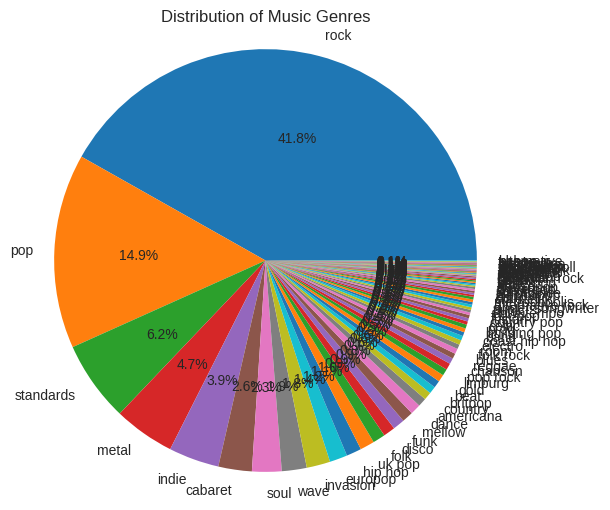

In [ ]:
# Prepare the data for the pie chart
labels = genre_counts.index
sizes = genre_counts.values

# Create a pie chart
plt.figure(figsize=(6, 6)) # Adjust the figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct formats the value displayed on the pie chart

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.title('Distribution of Music Genres') # Optional: Add a title to the pie chart
plt.show()

The dataset shows "Rock" as the most common genre with 834 songs (41.8%), followed by "Pop" with 297 songs (14.9%). Other genres, including "Standards," "Metal," and "Indie," are also present but with fewer songs. Some genres, like "Indie Folk," "Hardcore," "Trance," "Alternative," and "Bebop," are represented by only one song, suggesting the dataset may not be comprehensive or that these genres are less common.






> **Q2. Top Genre and Popularity: How does the top genre of a song affect its popularity? Are songs from certain genres more popular?**




In [ ]:
#find genres with highest value of popularity
spotify_df.groupby(['Top Genre']).aggregate({'Popularity' : 'max'}).sort_values('Popularity',ascending = False).head(5)

,Popularity
Top Genre,
pop,100
electropop,95
rock,88
mellow,86
room,85


In our exploration of the relationship between song genres and their popularity, we analyzed two key metrics: the maximum popularity and the median popularity within each genre. Our initial analysis focused on identifying the top genres based on the maximum popularity value. The results revealed that the genres with the highest maximum popularity were 'pop', 'electropop', 'rock', 'mellow', and 'room'. This suggests that songs within these genres have achieved the highest peak of popularity.

In [ ]:
genre_popularity = spotify_df.groupby('Top Genre')['Popularity'].median()
genre_popularity_descending = genre_popularity.sort_values(ascending=False)
print(genre_popularity_descending)

Top Genre
electropop          84.0
psych               80.5
ccm                 80.0
band                76.5
folk-pop            75.5
                    ... 
alternative rock    32.5
prog                32.0
streektaal          28.0
ambient             28.0
italian pop         24.0
Name: Popularity, Length: 80, dtype: float64


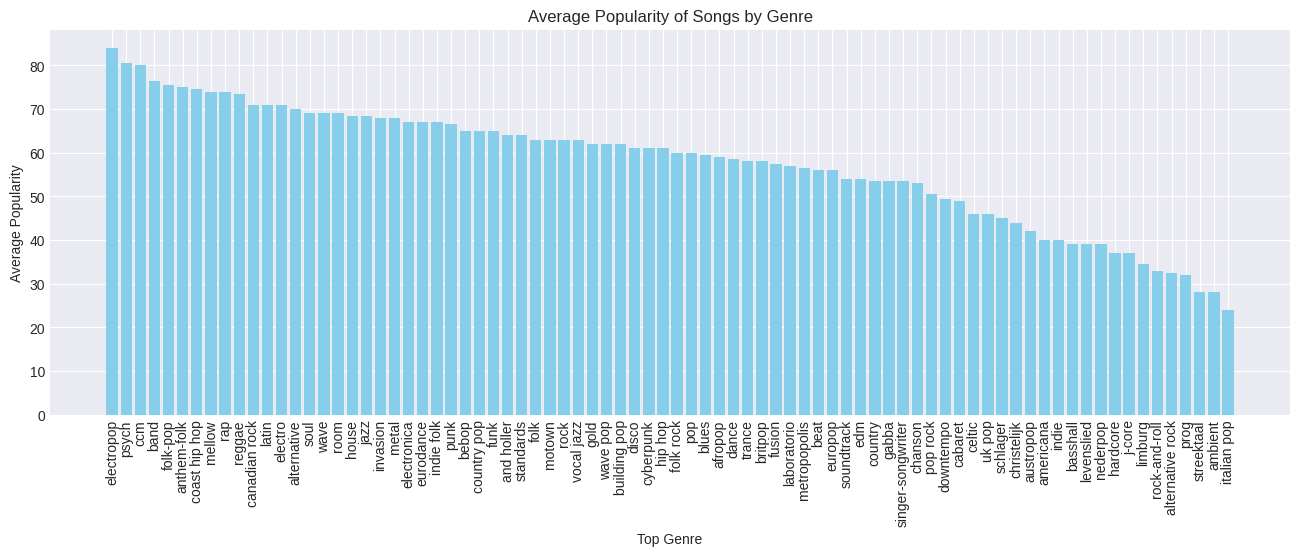

In [ ]:
# Create a bar chart of 'Top Genre' vs. 'Popularity'
plt.figure(figsize=(16,5))
plt.bar(genre_popularity_descending.index, genre_popularity_descending.values, color='skyblue')

plt.title('Average Popularity of Songs by Genre')
plt.xlabel('Top Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

Following this, we calculated the median popularity for each genre, which provides a more nuanced view of the average popularity within each genre. The median popularity results showed that 'electropop', 'psych', 'ccm', 'band', and 'folk-pop' had the highest median popularity values. This indicates that, on average, songs within these genres are quite popular.

These findings highlight the impact of a song's genre on its popularity. The genres with the highest maximum popularity are those with the most popular individual songs, suggesting that these genres are particularly popular or that they have songs that stand out in terms of popularity. Additionally, the genres with the highest median popularity are those where the majority of songs are quite popular, indicating a broad appeal within these genres.

However, it's important to consider that popularity can vary significantly within each genre, and other factors beyond genre may also play a significant role in a song's popularity. For instance, the unequal representation of genres in our dataset could influence the distribution of popularity values. This suggests that while genre is a significant factor, it is not the sole determinant of a song's popularity.

Performing a more detailed statistical analysis, such as regression analysis, to understand how genre, along with other variables, predicts song popularity.



> **Q3. Yearly Trends: How has the popularity of songs changed over the years from 1956 to 2019? Are there any notable peaks or troughs?**



In [ ]:
yearly_popularity = spotify_df.groupby('Year')['Popularity'].mean()
print(yearly_popularity)

Year
1956    62.000000
1958    67.800000
1959    65.000000
1960    74.000000
1961    78.000000
          ...    
2015    53.500000
2016    57.342857
2017    62.800000
2018    49.865385
2019    63.952381
Name: Popularity, Length: 63, dtype: float64


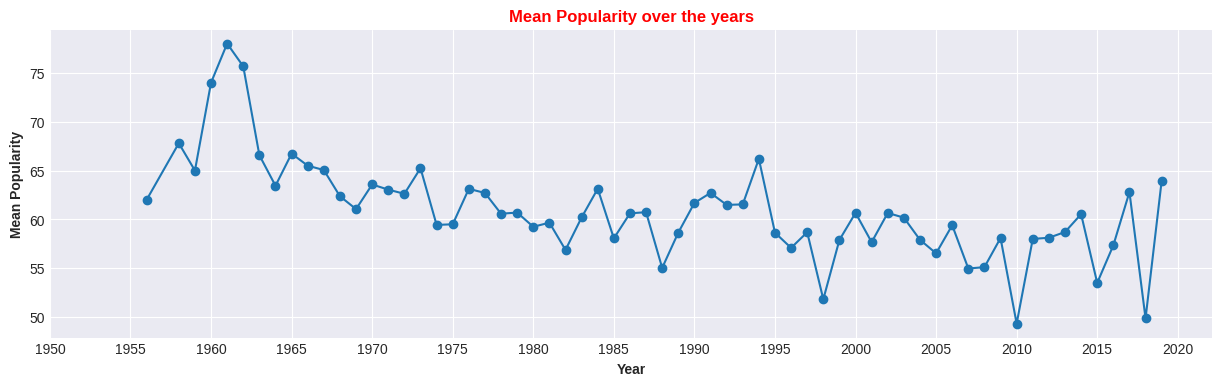

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = spotify_df.groupby('Year')['Popularity'].mean().plot(marker='o')
ax.set_title('Mean Popularity over the years', c='r', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_xticks(range(1950, 2021, 5))
plt.show()

The analysis of the data highlights the dynamic nature of song popularity over the years from 1956 to 2019. While there is a general trend of decreasing popularity from the early 1960s to the late 2000s, the data also shows notable peaks and troughs. The highest average popularity score of 78.00 in 1961 indicates a significant peak in popularity during that era, possibly due to the influence of certain music genres or artists. Conversely, the lowest average popularity score of 49.33 in 2010 suggests a trough in popularity towards the end of the dataset's range. These fluctuations reflect the complex interplay of various factors, including changes in music tastes, the rise of streaming services, and the diversification of music genres, over time. Therefore, the popularity of songs cannot be generalized as a simple increase or decrease but rather as a series of ups and downs that reflect the evolving landscape of the music industry and listener preferences.

In [ ]:
# Create a new column 'Decade' by extracting the decade from the 'Year' column
spotify_df['Decade'] = spotify_df['Year'].apply(lambda x: x //  10 *  10)

# Group by 'Decade' and calculate the mean 'Popularity' for each decade
decade_popularity = spotify_df.groupby('Decade')['Popularity'].mean()

# Print the average popularity per decade
print(decade_popularity)

Decade
1950    66.222222
1960    64.164557
1970    62.130312
1980    59.447674
1990    59.471299
2000    57.975000
2010    56.904762
Name: Popularity, dtype: float64


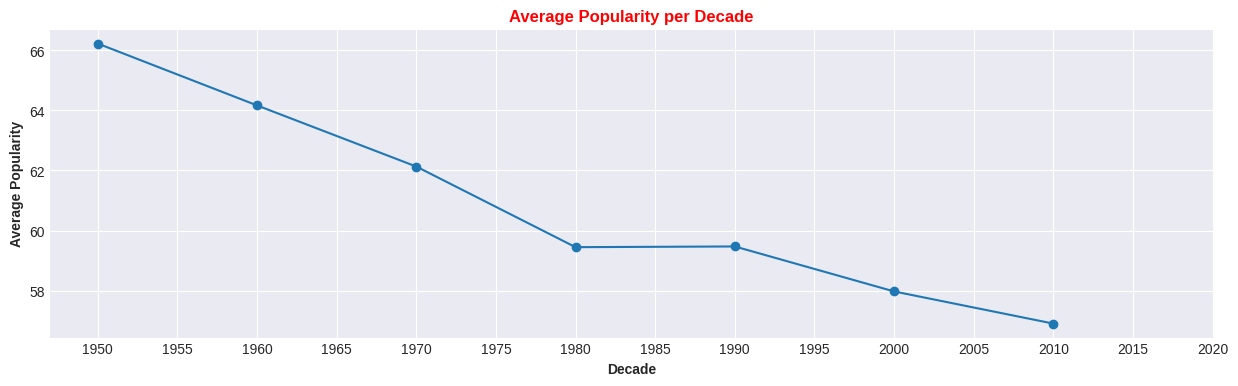

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))

# Plot the line chart
ax.plot(decade_popularity.index, decade_popularity.values, marker='o')

# Set the title, labels, and grid
ax.set_title('Average Popularity per Decade', c='r', weight='bold')
ax.set_ylabel('Average Popularity', weight='bold')
ax.set_xlabel('Decade', weight='bold')
ax.grid(True)

# Set x-ticks at intervals of 5 years for better readability
ax.set_xticks(range(1950, 2021, 5))

# Show the plot
plt.show()

If we look at the data on popularity per decade, it shows a general decrease in the average popularity of songs from the 1950s to the 2000s, with a notable peak in popularity around the 1960s, since 1961 had the highest peak, from 1980 to 1990, the trend becomes constant, possibly due to the similarities of music genres popular in that decade, and a trough in popularity towards the end of the dataset's range, particularly in the 2010s.


> **Q4. Tempo Analysis: What is the average BPM of songs across different genres? Are there genres with a distinct tempo range?**


In [ ]:
genre_bpm = spotify_df.groupby('Top Genre')['Beats Per Minute (BPM)'].median()
genre_bpm_sorted = genre_bpm.sort_values(ascending=False)
print(genre_bpm_sorted)

Top Genre
laboratorio     189.0
latin           178.5
alternative     176.0
bebop           174.0
hardcore        174.0
                ...  
soundtrack       90.0
building pop     86.0
motown           81.0
cyberpunk        74.0
anthem-folk      69.0
Name: Beats Per Minute (BPM), Length: 80, dtype: float64


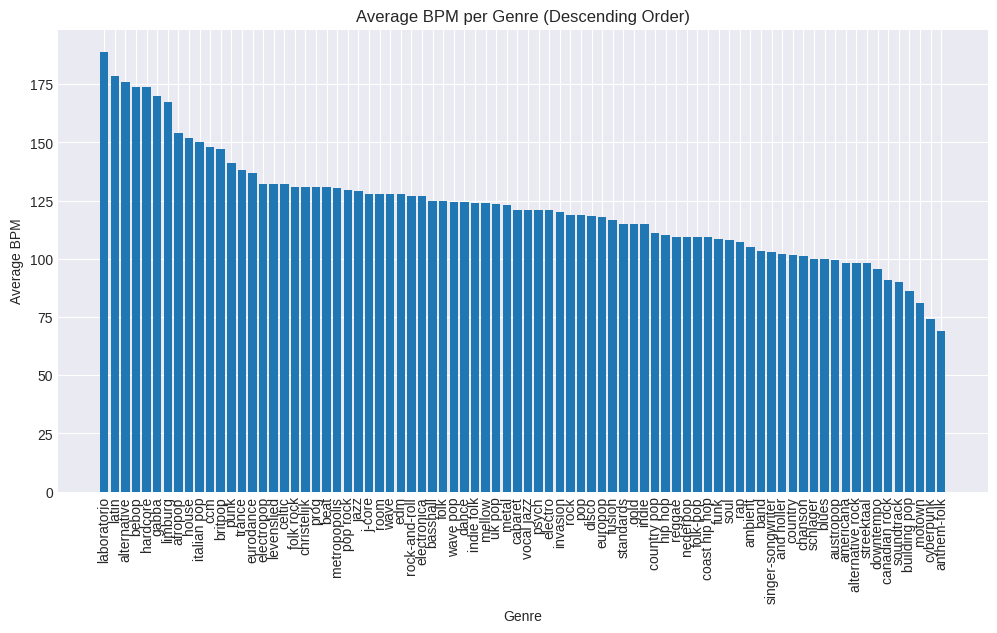

In [ ]:
# Create a bar chart
plt.figure(figsize=(12,   6))
plt.bar(genre_bpm_sorted.index, genre_bpm_sorted.values)
plt.xlabel('Genre')
plt.ylabel('Average BPM')
plt.title('Average BPM per Genre (Descending Order)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

The analysis of the average BPM across different genres reveals a distinct tempo range within each genre. This variation in tempo is a significant factor in the genre's musical style and appeal. Genres like "Laboratorio" and "Latin" are characterized by faster tempos, while "Motown" and "Anthem-folk" are associated with slower tempos. This analysis underscores the influence of genre on the tempo of songs, highlighting the diversity and richness of musical styles across different genres.



> **Q5. Correlation Analysis: Perform a correlation analysis between different features (e.g., energy, danceability, loudness, valence, length, acousticness, speechiness, and popularity) to identify any strong relationships.**



In [ ]:
correlation_matrix = spotify_df.corr()
print(correlation_matrix)

                           Index      Year  Beats Per Minute (BPM)    Energy  \
Index                   1.000000 -0.607910               -0.048918 -0.114307   
Year                   -0.607910  1.000000                0.012570  0.147235   
Beats Per Minute (BPM) -0.048918  0.012570                1.000000  0.156644   
Energy                 -0.114307  0.147235                0.156644  1.000000   
Danceability           -0.047156  0.077493               -0.140602  0.139616   
Loudness (dB)          -0.260179  0.343764                0.092927  0.735711   
Liveness               -0.027125  0.019017                0.016256  0.174118   
Valence                 0.063304 -0.166163                0.059653  0.405175   
Length (Duration)       0.024119 -0.050346                0.006252  0.022800   
Acousticness            0.057346 -0.132946               -0.122472 -0.665156   
Speechiness            -0.050991  0.054097                0.085598  0.205865   
Popularity              0.087442 -0.1589

<ipython-input-25-17e700364d2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = spotify_df.corr()


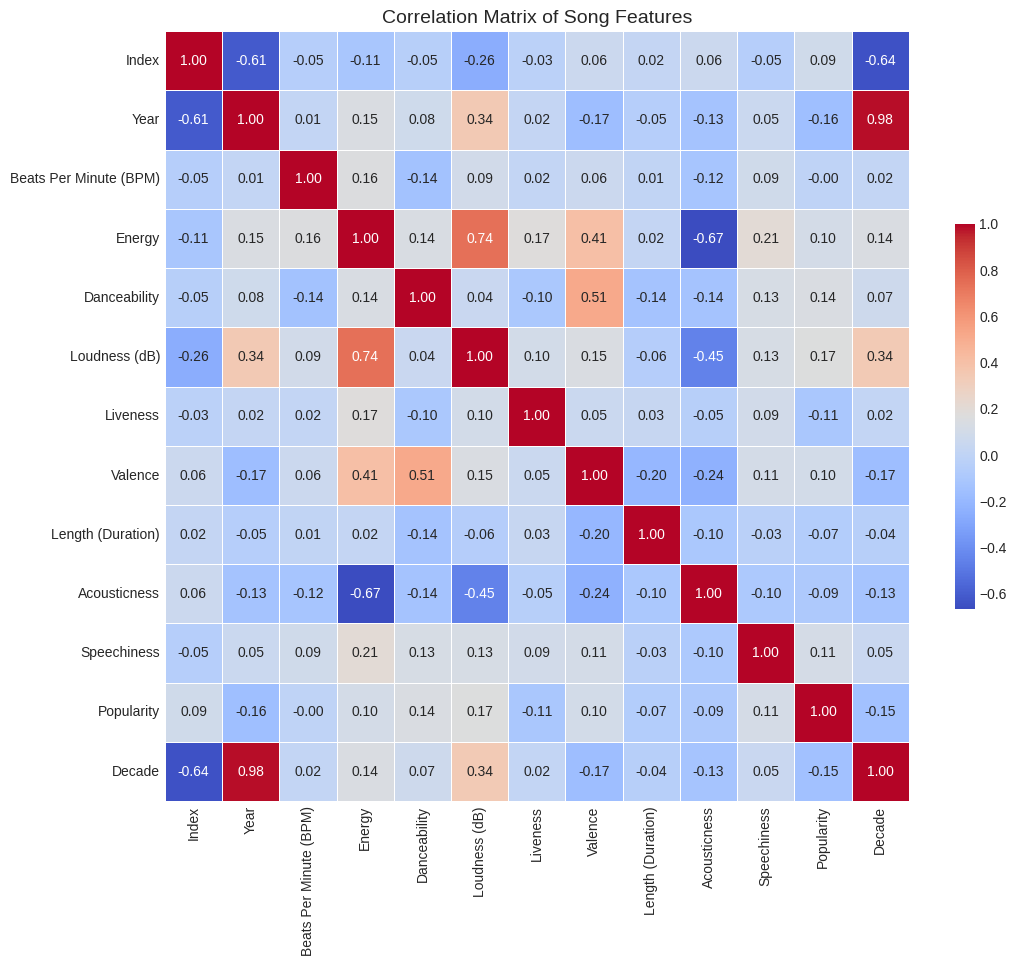

In [ ]:
import seaborn as sns
import matplotlib.text

# Create a heatmap with increased font size and figure size
plt.figure(figsize=(12,  10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Adjust the font size of the numbers
for text in plt.gca().get_children():
    if isinstance(text, matplotlib.text.Text):
        text.set_size(10)  # Adjust font size as needed

plt.title('Correlation Matrix of Song Features', fontsize=14)  # Adjust title font size
plt.show()

In summary, the correlation analysis reveals that energy, loudness, valence, and speechiness are the most significant factors in determining a song's popularity. Acousticness, on the other hand, is less popular compared to other genres. The length, liveness, and danceability of a song also have some effect on its popularity, but their impact is not as strong as the other factors. Moreover, we will look into the different variables and their correlations with population to visualize their plots.



> **Q5.a. How do the energy, danceability, and loudness of songs correlate with each other?**



From the correlation matrix, we can see the correlation coefficients between energy, danceability, and loudness:
Energy and Danceability: 0.139616
Energy and Loudness: 0.735711
Danceability and Loudness: 0.04

The analysis of the correlation coefficients between energy, danceability, and loudness reveals a strong positive relationship between energy and loudness, indicating that as the energy of a song increases, its loudness also tends to increase significantly. This makes intuitive sense, as higher energy levels are often associated with louder sounds. However, the relationship between energy and danceability is weak, suggesting that while energy can influence danceability to some extent, other factors likely play a more significant role in determining a song's danceability. Similarly, the correlation between danceability and loudness is very low, indicating a weak relationship, suggesting that loudness can influence danceability to some extent, but other factors likely play a more significant role in determining a song's danceability.



> **Q5.b.How do the acoustic and speechiness values of songs relate to their danceability and energy?**



To understand how the acoustic and speechiness values of songs relate to their danceability and energy, we look at the correlation coefficients in the matrix:

Acousticness and Danceability: -0.135769
Acousticness and Energy: -0.665156
Speechiness and Danceability: 0.125229
Speechiness and Energy: 0.205865

The relationships between acousticness, speechiness, danceability, and energy suggest that acousticness is strongly inversely related to energy, indicating that songs with more acoustic elements are less likely to be high-energy. Speechiness shows a weak positive correlation with both danceability and energy, suggesting that it can influence these aspects to some extent, but other factors likely play a more significant role. Danceability, on the other hand, shows a weak negative correlation with acousticness and a weak positive correlation with speechiness, indicating that while acousticness can influence danceability to some extent, speechiness can also have a positive influence, but the relationships are not very strong.


> **Q6. Energy Levels: How does the energy level of a song correlate with its popularity? Are there songs with high energy levels that are also popular?**



In [ ]:
# Calculate the correlation coefficient between 'Energy' and 'Popularity'
correlation_coefficient = spotify_df['Energy'].corr(spotify_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Energy and Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Energy and Popularity: 0.10


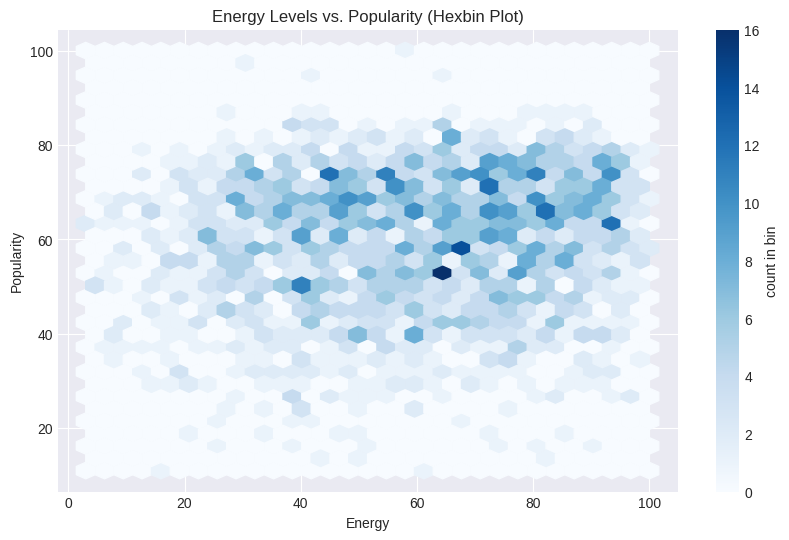

In [ ]:
plt.figure(figsize=(10,  6))
plt.hexbin(spotify_df['Energy'], spotify_df['Popularity'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')
plt.title('Energy Levels vs. Popularity (Hexbin Plot)')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

The analysis indicates a positive correlation between the
energy level of a song and its popularity. However, since it is a weak positive correlation, instead of a scatterplot, a Hexbin plot was used to visualize the trend. There is not much to see but we can see that an energy around 50 to 90 seems to be more popular than the others.



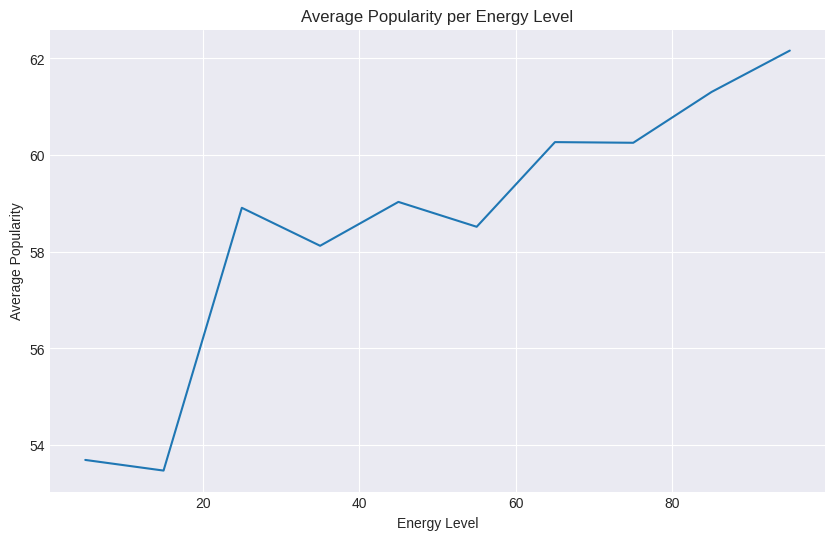

In [ ]:
bins = np.arange(0,   200,   10)  # bins of size 10 from 0 to 200

# Group by energy level and calculate the average popularity for each group
grouped = spotify_df.groupby(pd.cut(spotify_df['Energy'], bins=bins))

# Calculate the mean of 'Popularity' for each group
average_popularity = grouped['Popularity'].mean()

# Extract the midpoints of the bins
midpoints = average_popularity.index.categories.mid

# Plot the average popularity per energy level
plt.figure(figsize=(10,   6))
sns.lineplot(x=midpoints, y=average_popularity)
plt.title('Average Popularity per Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Average Popularity')
plt.show()

By taking the average popularity per energy level, we are able to see the positive correlation much clearer in this line graph. Since the correlation coefficient is 0.10, it means that this is a weak positive correlation. A weak correlation would suggest that while there is a slight positive relationship between the energy level of a song and its popularity, this relationship is not strong. This means that as the energy level of a song increases, its popularity also tends to increase, but the effect is very small. There could be other factors that affect the popularity level.





> **Q7. Danceability vs. Popularity: Is there a correlation between a song's danceability and its popularity? Do songs with higher danceability tend to be more popular?**



In [ ]:
# Calculate the correlation coefficient between 'Danceability' and 'Popularity'
correlation_coefficient = spotify_df['Danceability'].corr(spotify_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Danceability and Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Danceability and Popularity: 0.14


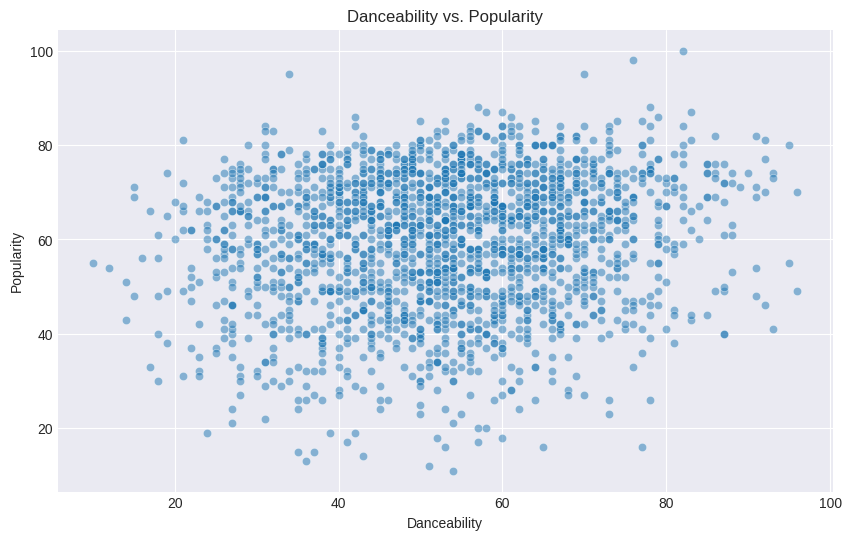

In [ ]:
plt.figure(figsize=(10,  6))
sns.scatterplot(x='Danceability', y='Popularity', data=spotify_df, alpha=0.5)
plt.title('Danceability vs. Popularity')
plt.show()

A correlation coefficient of 0.14 suggests that while there is a slight positive relationship between Danceability and Popularity, the effect is not very strong. This could mean that while songs with higher danceability tend to be more popular, other factors likely play a more significant role in determining a song's popularity.



> **Q8. Loudness and Popularity: How does the loudness of a song affect its popularity? Are louder songs more popular?**



In [ ]:
correlation_coefficient = spotify_df['Loudness (dB)'].corr(spotify_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Loudness and Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Loudness and Popularity: 0.17


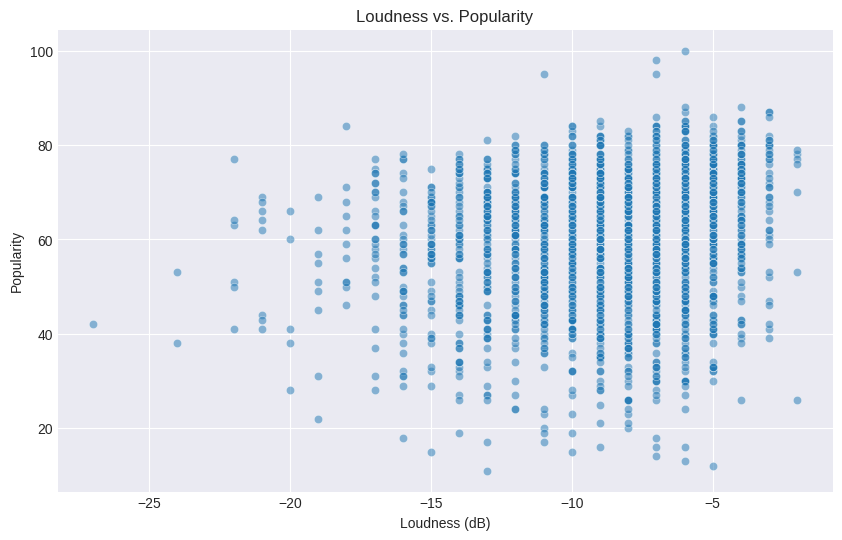

In [ ]:
# Create a scatterplot of 'Loudness (dB)' vs. 'Popularity'
plt.figure(figsize=(10,  6))
sns.scatterplot(x='Loudness (dB)', y='Popularity', data=spotify_df, alpha=0.5)

# Add a title and labels to the plot
plt.title('Loudness vs. Popularity')
plt.xlabel('Loudness (dB)')
plt.ylabel('Popularity')

# Show the plot
plt.show()

Given that the correlation coefficient between Loudness and Popularity is 0.17, this indicates a positive correlation but with a relatively weak strength. A correlation coefficient of 0.17 suggests that there is a slight positive relationship between the loudness of a song and its popularity, meaning that, on average, louder songs tend to be more popular. However, the effect is not very strong, as indicated by the relatively low value of the correlation coefficient. The scatterplot also shows that there is a spread of data points which means further analysis should be done to verify the strength of the correlation.



> **Q9. Valence and Popularity: Is there a relationship between the valence (mood) of a song and its popularity? Do songs with higher valence tend to be more popular?**



In [ ]:
correlation_coefficient = spotify_df['Valence'].corr(spotify_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Valence and Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Valence and Popularity: 0.10


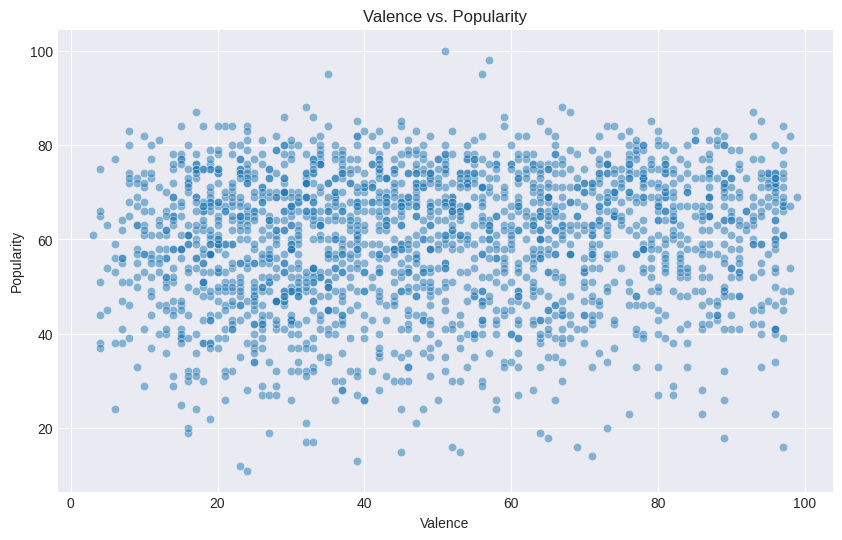

In [ ]:
plt.figure(figsize=(10,  6))
sns.scatterplot(x='Valence', y='Popularity', data=spotify_df, alpha=0.5)
plt.title('Valence vs. Popularity')
plt.show()

Given that the correlation coefficient between Valence (mood) and Popularity is 0.10, this indicates a positive correlation but with a very weak strength. A correlation coefficient of 0.10 suggests that there is a slight positive relationship between the valence of a song and its popularity, meaning that, on average, songs with higher valence (more positive mood) tend to be more popular. This is similar to the energy level.



> **Q10. Song Length and Popularity: How does the length of a song correlate with its popularity? Are longer songs more popular?**



In [ ]:
correlation_coefficient = spotify_df['Length (Duration)'].corr(spotify_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Length (Duration) and Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Length (Duration) and Popularity: -0.07


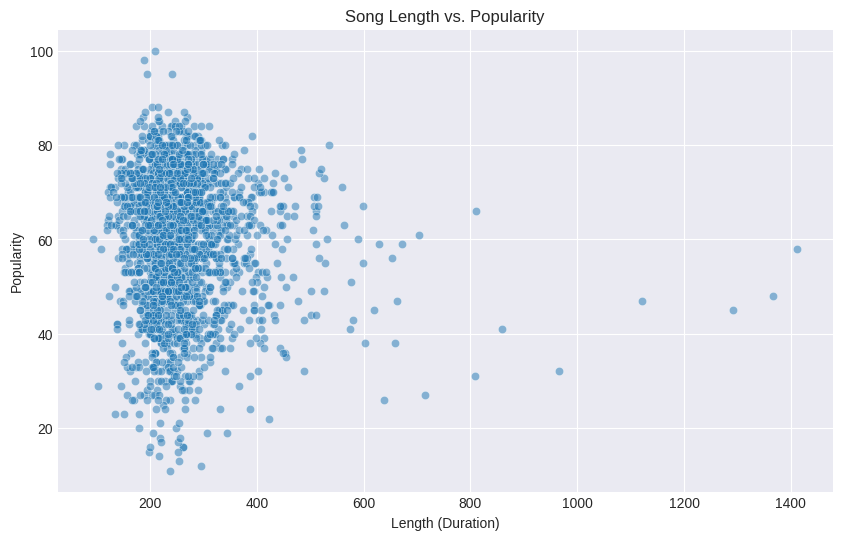

In [ ]:
plt.figure(figsize=(10,  6))
sns.scatterplot(x='Length (Duration)', y='Popularity', data=spotify_df, alpha=0.5)
plt.title('Song Length vs. Popularity')
plt.show()

Given that the correlation coefficient between Length (Duration) and Popularity is -0.07, this indicates a negative correlation but with a very weak strength. A correlation coefficient of -0.07 suggests that there is a slight negative relationship between the length of a song and its popularity, meaning that, on average, longer songs tend to be less popular. However, the effect is not very strong, as indicated by the relatively low absolute value of the correlation coefficient.


> **Q11. Acoustic vs. Popularity: Is there a correlation between the acousticness of a song and its popularity? Do acoustic songs tend to be more popular?**



In [ ]:
correlation_coefficient = spotify_df['Acousticness'].corr(spotify_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Acousticness and Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Acousticness and Popularity: -0.09


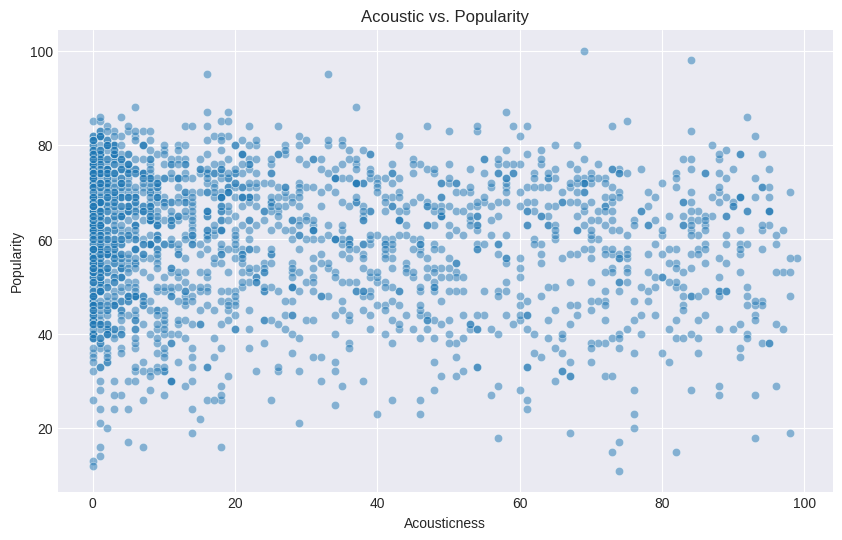

In [ ]:
plt.figure(figsize=(10,  6))
sns.scatterplot(x='Acousticness', y='Popularity', data=spotify_df, alpha=0.5)
plt.title('Acoustic vs. Popularity')
plt.show()

Given that the correlation coefficient between Acousticness and Popularity is -0.09, this indicates a negative correlation but with a very weak strength. A correlation coefficient of -0.09 suggests that there is a slight negative relationship between the acousticness of a song and its popularity, meaning that, on average, more acoustic songs tend to be less popular. However, the effect is not very strong, as indicated by the relatively low absolute value of the correlation coefficient.


> **Q12. Speechiness and Popularity: How does the speechiness of a song affect its popularity? Are songs with more spoken words more popular?**



In [ ]:
correlation_coefficient = spotify_df['Speechiness'].corr(spotify_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Speechiness and Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Speechiness and Popularity: 0.11


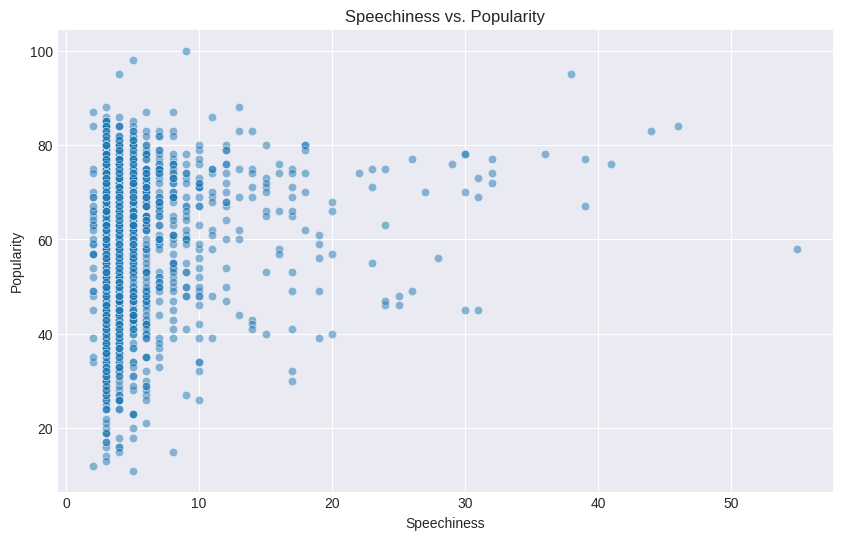

In [ ]:
plt.figure(figsize=(10,  6))
sns.scatterplot(x='Speechiness', y='Popularity', data=spotify_df, alpha=0.5)
plt.title('Speechiness vs. Popularity')
plt.show()

The correlation coefficient between Speechiness and Popularity is 0.11, this indicates a positive correlation but with a very weak strength. A correlation coefficient of 0.11 suggests that there is a slight positive relationship between the speechiness of a song and its popularity, meaning that, on average, songs with more spoken words tend to be more popular. However, the effect is not very strong, as indicated by the relatively low value of the correlation coefficient.



> **Q13. Decade Analysis: Analyze the dataset to see if there are any decade-specific trends in song characteristics (e.g., tempo, energy, danceability).**



In [ ]:
# Group by decade and calculate the mean of each characteristic for each decade
grouped_df = spotify_df.groupby('Decade').mean()

# Display the grouped data
print(grouped_df)

summary_stats = grouped_df.describe()

# Display the summary statistics
print(summary_stats)

         Index         Year  Beats Per Minute (BPM)     Energy  Danceability  \
Decade                                                                         
1950    1990.0  1958.111111              143.666667  45.333333     51.777778   
1960    1906.5  1966.810127              116.335443  49.436709     48.196203   
1970     976.0  1974.563739              120.280453  56.226629     51.583569   
1980    1324.5  1984.752907              121.081395  61.031977     57.020349   
1990    1662.0  1994.564955              118.042296  59.858006     51.474320   
2000     200.5  2004.797500              122.202500  64.360000     53.405000   
2010     600.0  2014.418546              120.230576  61.107769     54.766917   

        Loudness (dB)   Liveness    Valence  Length (Duration)  Acousticness  \
Decade                                                                         
1950       -11.777778  20.555556  72.000000         186.333333     71.111111   
1960       -10.613924  17.848101  52.98

<ipython-input-42-3b694419a720>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = spotify_df.groupby('Decade').mean()


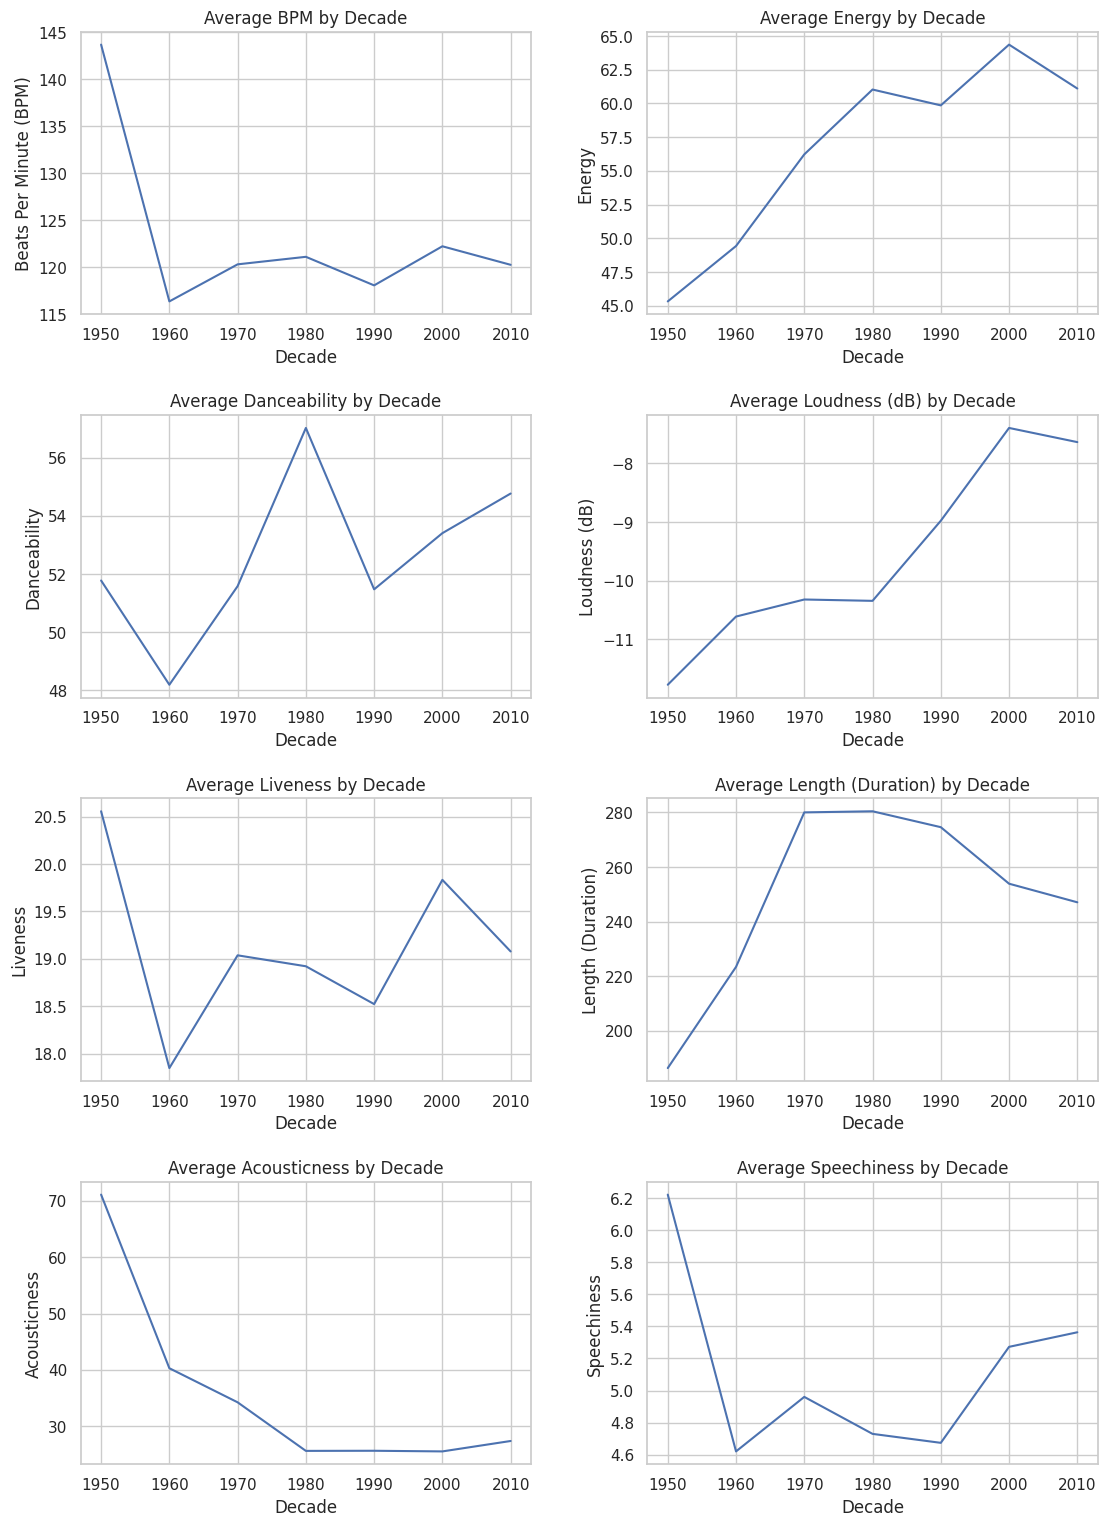

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_characteristics_by_decade(df, characteristics, titles):
    # Set the style for seaborn
    sns.set(style="whitegrid")

    # Create a  2x4 grid of subplots
    fig, axs = plt.subplots(4,  2, figsize=(12,  16))
    fig.tight_layout(pad=4.0)

    # Flatten the axes array for easier iteration
    axs = axs.flatten()

    for ax, characteristic, title in zip(axs, characteristics, titles):
        if characteristic in df.columns:
            sns.lineplot(data=df, x=df.index, y=characteristic, ax=ax)
            ax.set_title(title)
            ax.set_xlabel('Decade')
            ax.set_ylabel(characteristic)

    # Remove any unused subplots
    for ax in axs[len(characteristics):]:
        ax.remove()

    plt.show()

# List of characteristics to plot
characteristics = ['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Length (Duration)', 'Acousticness', 'Speechiness']

# Corresponding titles for each plot
titles = ['Average BPM by Decade', 'Average Energy by Decade', 'Average Danceability by Decade', 'Average Loudness (dB) by Decade',
          'Average Liveness by Decade', 'Average Length (Duration) by Decade', 'Average Acousticness by Decade', 'Average Speechiness by Decade']

# Generate the grid of plots
plot_characteristics_by_decade(grouped_df, characteristics, titles)

The analysis shows a general trend of increasing energy, danceability, and acousticness, and decreasing loudness, valence, and length of songs over the decades. There's also a notable increase in speechiness and a significant increase in popularity from the 1950s to the 2000s, with slight decreases in the 2010s. This suggests that music has become more energetic, danceable, and acoustic over time, with a slight return to quieter, less positive, and shorter songs in the most recent decade.



> **Q14. Artist Popularity: How does the popularity of an artist affect the popularity of their songs? Are songs by more popular artists more popular?**





In [ ]:
# Top 5 Popular Songs
print(spotify_df[['Artist', 'Popularity']].groupby('Artist')['Popularity'].max().nlargest(5).reset_index(name='Top 5'))

            Artist  Top 5
0      Tones and I    100
1         Maroon 5     98
2    Billie Eilish     95
3     Mariah Carey     95
4  Imagine Dragons     88


This part of the analysis identifies the top 5 most popular songs by artist, based on their maximum popularity score. The results show that songs by artists like Tones and I, Maroon 5, Billie Eilish, and Mariah Carey have the highest popularity scores. This suggests that these artists have songs that are particularly popular. This could indicate that these artists are particularly popular or that they have songs that stand out in terms of popularity.

In [ ]:
# Average Popularity of Artists

artist_popularity = spotify_df.groupby('Artist')['Popularity'].mean()
artist_popularity_descending = artist_popularity.sort_values(ascending=False)
print(artist_popularity_descending)

Artist
Tones and I            100.0
Billie Eilish           95.0
Mariah Carey            95.0
Panic! At The Disco     87.0
Maroon 5                86.0
                       ...  
Paolo Conte             25.0
Zucchero                24.0
Frans Halsema           23.5
Tori Amos               19.0
Wim Sonneveld           15.0
Name: Popularity, Length: 731, dtype: float64


This part calculates the average popularity of songs by each artist, which is then sorted in descending order. The results show a wide range of average popularity values across artists, with Tones and I, Billie Eilish, and Mariah Carey having the highest average popularity. This suggests that, on average, songs by these artists are quite popular. This could indicate that these artists are generally well-received or that they have a broad appeal.

In [ ]:
# Convert the artist popularity series to a DataFrame
artist_popularity_df = artist_popularity_descending.reset_index()

# Rename the columns for clarity
artist_popularity_df.columns = ['Artist', 'Artist Popularity']

# Merge the artist popularity data back into the original dataset
merged_df = pd.merge(spotify_df, artist_popularity_df, on='Artist', how='left')

# Calculate the correlation coefficient between 'Artist Popularity' and 'Popularity'
correlation_coefficient = merged_df['Artist Popularity'].corr(merged_df['Popularity'])

# Print the correlation coefficient
print(f"Correlation Coefficient between Artist Popularity and Song Popularity: {correlation_coefficient:.2f}")

Correlation Coefficient between Artist Popularity and Song Popularity: 0.85


A correlation coefficient of 0.85 suggests that as an artist's popularity increases, the popularity of their songs also tends to increase. This could be due to various factors, such as the artist's influence on their songs, the quality of their music, or the marketing and promotion of their songs.

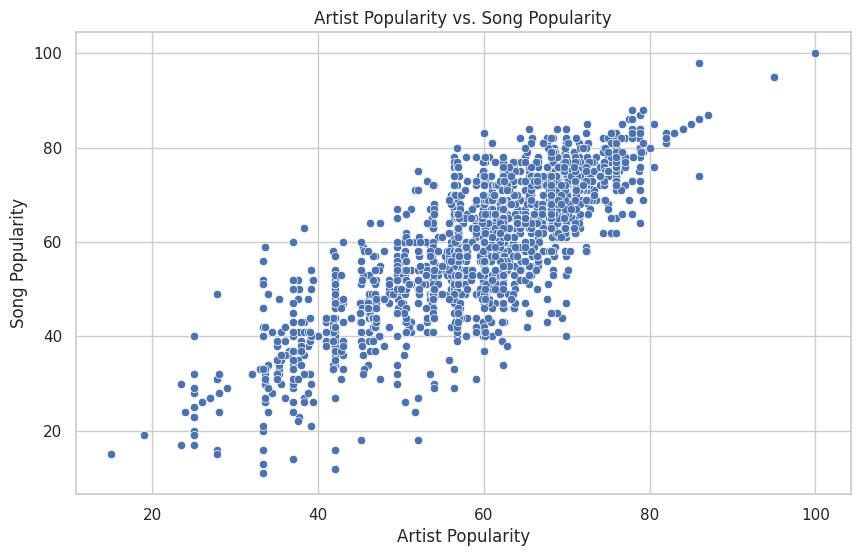

In [ ]:
# Create a scatterplot of 'Artist Popularity' vs. 'Popularity'
plt.figure(figsize=(10,   6))
sns.scatterplot(x='Artist Popularity', y='Popularity', data=merged_df)

# Add a title and labels to the plot
plt.title('Artist Popularity vs. Song Popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Song Popularity')

# Show the plot
plt.show()

The scatterplot shows a positive linear association which shows that the more popular an artist is, the more likely a song will be popular. Given that the correlation coefficient between Artist Popularity and Song Popularity is 0.85, this indicates a strong positive correlation. A correlation coefficient of 0.85 suggests that there is a very strong positive relationship between the popularity of an artist and the popularity of their songs. This means that, on average, songs by more popular artists tend to be more popular.


>  **Q15. How does the popularity of artists vary across different genres?**




<ipython-input-48-1bc7da54a9c8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Top Genre', y='Average Artist Popularity', data=average_artist_popularity_by_genre, palette='viridis')


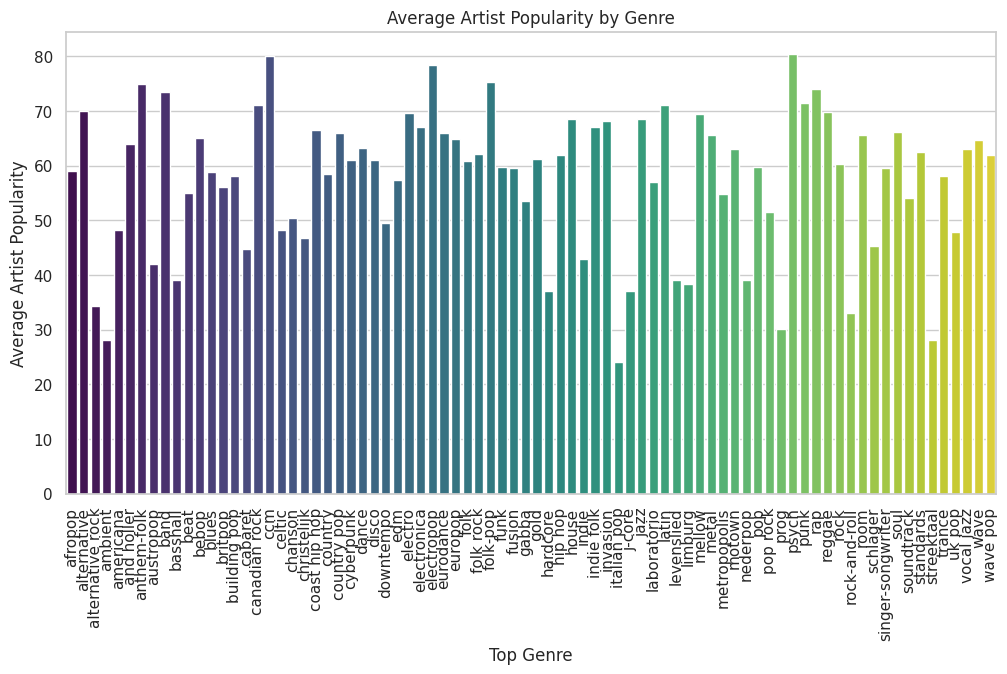

In [ ]:
# Calculate the average song popularity by artist and genre
average_song_popularity_by_artist_genre = spotify_df.groupby(['Artist', 'Top Genre'])['Popularity'].mean().reset_index()

# Calculate the average artist popularity by genre
average_artist_popularity_by_genre = average_song_popularity_by_artist_genre.groupby('Top Genre')['Popularity'].mean().reset_index()

# Rename the columns for clarity
average_artist_popularity_by_genre.columns = ['Top Genre', 'Average Artist Popularity']

# Plot the average artist popularity by genre with rotated x-axis labels
plt.figure(figsize=(12,   6))
sns.barplot(x='Top Genre', y='Average Artist Popularity', data=average_artist_popularity_by_genre, palette='viridis')

# Rotate x-axis labels by   90 degrees
plt.xticks(rotation=90)

# Add a title and labels to the plot
plt.title('Average Artist Popularity by Genre')
plt.xlabel('Top Genre')
plt.ylabel('Average Artist Popularity')

# Show the plot
plt.show()

In [ ]:
ranked_genres = average_artist_popularity_by_genre.sort_values(by='Average Artist Popularity', ascending=False)
print(ranked_genres)

        Top Genre  Average Artist Popularity
62          psych                  80.500000
17            ccm                  80.000000
31     electropop                  78.333333
36       folk-pop                  75.333333
6     anthem-folk                  75.000000
..            ...                        ...
67  rock-and-roll                  33.000000
61           prog                  30.125000
74     streektaal                  28.000000
3         ambient                  28.000000
47    italian pop                  24.000000

[80 rows x 2 columns]


In [ ]:
most_popular_genre = average_artist_popularity_by_genre.loc[average_artist_popularity_by_genre['Average Artist Popularity'].idxmax()]['Top Genre']
least_popular_genre = average_artist_popularity_by_genre.loc[average_artist_popularity_by_genre['Average Artist Popularity'].idxmin()]['Top Genre']

print(f"Most popular genre: {most_popular_genre}")
print(f"Least popular genre: {least_popular_genre}")

Most popular genre: psych
Least popular genre: italian pop


The analysis indicates that the popularity of artists varies significantly across different genres. This variation can be influenced by a range of factors, including market demand, audience preferences, and the perceived quality or style of music within each genre. Understanding these trends can be valuable for artists, managers, and marketers in making informed decisions about genre selection, marketing strategies, and audience targeting.

> **Q16**. How does the tempo (BPM) of songs relate to their valence (mood)? Are faster songs generally more positive or negative?




In [ ]:
correlation = spotify_df['Beats Per Minute (BPM)'].corr(spotify_df['Valence'])
print(f"Correlation between BPM and Valence: {correlation}")

Correlation between BPM and Valence: 0.05965322303547383


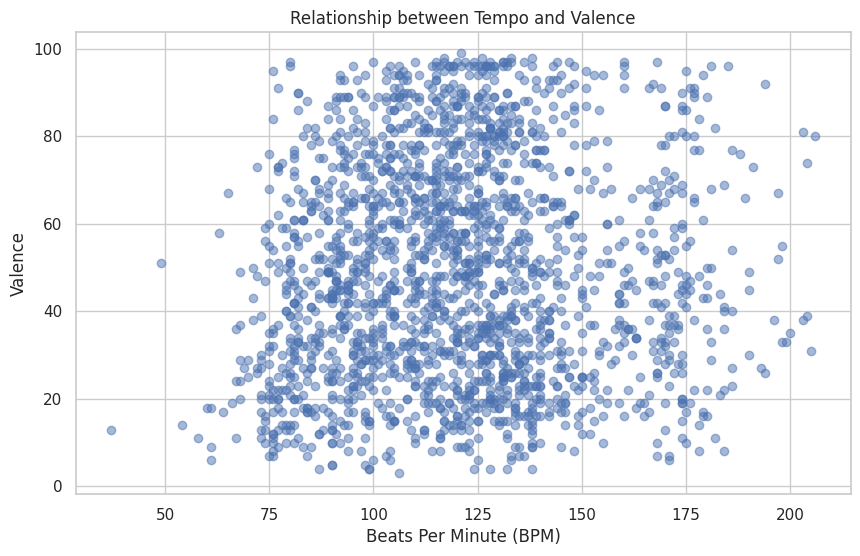

In [ ]:
# Create a scatter plot of BPM vs. Valence
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['Beats Per Minute (BPM)'], spotify_df['Valence'], alpha=0.5)

# Add labels and title
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Valence')
plt.title('Relationship between Tempo and Valence')

# Show the plot
plt.show()

The analysis of the relationship between the tempo (Beats Per Minute, BPM) of songs and their valence (mood) reveals a correlation coefficient of 0.05965322303547383, indicating a very weak linear relationship between these two variables. This suggests that the tempo of a song does not significantly influence its mood, with faster songs not generally being more positive or negative than slower songs. The correlation coefficient, close to zero, implies that while tempo might have some minor impact on the mood of a song, this effect is not consistent or strong enough to be considered a significant factor in determining the song's valence. This finding underscores the complexity of song mood, highlighting that other musical and lyrical elements likely play a more substantial role in shaping the perceived mood of a song.

# Research Question
How does the combination of audio features (e.g., energy, danceability, loudness, valence, length, acousticness, speechiness) influence the popularity of a song across different decades?

#### Connection to the Exploratory Data Analysis

> This question arises from the EDA, which revealed significant trends and correlations between song features and their popularity. For instance, the correlation analysis showed that energy, loudness, valence, and speechiness are the most significant factors in determining a song's popularity. Additionally, the decade analysis indicated a general trend of increasing energy, speechiness, and danceability, and decreasing acousticness, loudness, valence, and length of songs over the decades. This suggests that the popularity of a song is influenced not only by its individual features but also by the broader musical trends of its era.




#### Significance




> The importance and significance of this research question lie in its potential to provide insights into the evolution of music preferences and the factors that contribute to a song's success over time. Understanding these trends can be valuable for artists, music producers, and marketers in creating music that resonates with current and future audiences. It can also inform strategies for music streaming platforms and radio stations in curating playlists and programming that align with listener preferences.
---



# Phase 2 - Data Modelling, Statistical Inference, and Insights and Conclusions.


In [ ]:
spotify_df.head(1000)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Decade
0,1,Sunrise,Norah Jones,standards,2004,157,30,53,-14,11,68,201,94,3,71,2000
1,2,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,207,17,7,39,2000
2,3,Clint Eastwood,Gorillaz,hip hop,2001,168,69,66,-9,7,52,341,2,17,69,2000
3,4,The Pretender,Foo Fighters,metal,2007,173,96,43,-4,3,37,269,0,4,76,2000
4,5,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,256,1,3,59,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Show Me The Way,Peter Frampton,rock,1975,130,73,70,-8,10,64,243,43,3,66,1970
996,997,Meeting Across the River,Bruce Springsteen,rock,1975,105,29,46,-10,18,26,197,82,3,43,1970
997,998,Love Is The Drug,Roxy Music,rock,1975,125,76,84,-5,3,60,251,6,9,60,1970
998,999,Still Crazy After All These Years,Paul Simon,rock,1975,37,25,27,-12,9,13,207,80,4,61,1970


## Data Modeling

#### Normalization

> Normalization is a crucial preprocessing step that scales the features to a standard range, ensuring that all features contribute equally to the model. This is particularly important for datasets with features of different scales, as it prevents features with larger scales from dominating the model.



In [ ]:
import pandas as pd

# Load the dataset
spotify_df = pd.read_csv('Spotify-2000.csv')

# Define the columns to normalize
columns_to_normalize = ['Energy', 'Danceability', 'Loudness (dB)', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness']

# Ensure the columns are of numeric type and fill missing values with a default value (e.g., 0)
for column in columns_to_normalize:
    spotify_df[column] = pd.to_numeric(spotify_df[column], errors='coerce').fillna(0)

# Normalize the selected columns
for column in columns_to_normalize:
    spotify_df[column] = (spotify_df[column] - spotify_df[column].min()) / (spotify_df[column].max() - spotify_df[column].min())

# Check the first few rows to verify normalization
print(spotify_df[columns_to_normalize].head())

     Energy  Danceability  Loudness (dB)   Valence  Length (Duration)  \
0  0.278351      0.500000           0.52  0.677083           0.208075   
1  0.783505      0.465116           0.64  0.812500           0.214286   
2  0.680412      0.651163           0.72  0.510417           0.353002   
3  0.958763      0.383721           0.92  0.354167           0.278468   
4  0.814433      0.558140           0.88  0.875000           0.265010   

   Acousticness  Speechiness  
0      0.949495     0.018868  
1      0.171717     0.094340  
2      0.020202     0.283019  
3      0.000000     0.037736  
4      0.010101     0.018868  


The output you've provided shows the normalized values for the selected columns in your dataset. Each column has been scaled to a range between 0 and 1, which is the goal of normalization.

*   Energy: The energy of the song, scaled to a range of 0 to 1. Higher values indicate more energetic songs.
*   Danceability: The danceability of the song, scaled similarly. Higher values indicate songs that are easier to dance to.
*   Loudness (dB): The loudness of the song, scaled to a range of 0 to 1. Higher values indicate louder songs.
*   Valence: The valence of the song, scaled to a range of 0 to 1. Higher values indicate more positive moods.
*   Length (Duration): The duration of the song, scaled to a range of 0 to 1. Longer songs have higher values.
*   Acousticness: The acousticness of the song, scaled to a range of 0 to 1. Higher values indicate more acoustic songs.
*   Speechiness: The speechiness of the song, scaled to a range of 0 to 1. Higher values indicate songs with more spoken words.



#### One-Hot Encoding


> One-hot encoding is used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. For the "Top Genre" column, you can use pandas' get_dummies function to perform one-hot encoding.


In [ ]:
# Set the display options to show more columns
pd.set_option('display.max_columns', None)

# Perform one-hot encoding on the 'Top Genre' column
spotify_df = pd.get_dummies(spotify_df, columns=['Top Genre'])

# Display the first few rows to verify the one-hot encoding
print(spotify_df.head())

   Index                   Title             Artist  Year  \
0      1                 Sunrise        Norah Jones  2004   
1      2             Black Night        Deep Purple  2000   
2      3          Clint Eastwood           Gorillaz  2001   
3      4           The Pretender       Foo Fighters  2007   
4      5  Waitin' On A Sunny Day  Bruce Springsteen  2002   

   Beats Per Minute (BPM)    Energy  Danceability  Loudness (dB)  Liveness  \
0                     157  0.278351      0.500000           0.52        11   
1                     135  0.783505      0.465116           0.64        17   
2                     168  0.680412      0.651163           0.72         7   
3                     173  0.958763      0.383721           0.92         3   
4                     106  0.814433      0.558140           0.88        10   

    Valence  Length (Duration)  Acousticness  Speechiness  Popularity  \
0  0.677083           0.208075      0.949495     0.018868          71   
1  0.812500       

#### Feature Engineering


> Create new features that might be relevant, such as a combination of Energy and Danceability, or a ratio of Loudness to Length.

#### Step 1: Combine Audio Features



> Create a new feature that combines multiple audio features.



In [ ]:
# Combine Energy and Danceability
spotify_df['Energy_Danceability'] = spotify_df['Energy'] + spotify_df['Danceability']

# Combine Loudness and Valence
spotify_df['Loudness_Valence'] = spotify_df['Loudness (dB)'] + spotify_df['Valence']

# Combine Acousticness and Speechiness
spotify_df['Acousticness_Speechiness'] = spotify_df['Acousticness'] + spotify_df['Speechiness']

#### Create Ratio Features


> Create features that represent ratios between pairs of audio features. This could help capture how these features relate to each other.




In [ ]:
# Ratio of Loudness to Length
spotify_df['Loudness_Length_Ratio'] = spotify_df['Loudness (dB)'] / spotify_df['Length (Duration)']

# Ratio of Energy to Danceability
spotify_df['Energy_Danceability_Ratio'] = spotify_df['Energy'] / spotify_df['Danceability']

# Ratio of Valence to Acousticness
spotify_df['Valence_Acousticness_Ratio'] = spotify_df['Valence'] / spotify_df['Acousticness']

#### Decade-Specific Features


> Calculate the average values of audio features for each decade. This could help identify if certain decades had songs with higher or lower average values for these features.




In [ ]:
# Create a 'Decade' column by extracting the decade from the 'Year' column
spotify_df['Decade'] = (spotify_df['Year'] // 10) * 10

# Now you can calculate the average values for each decade
spotify_df['Avg_Energy_Decade'] = spotify_df.groupby('Decade')['Energy'].transform('mean')
spotify_df['Avg_Danceability_Decade'] = spotify_df.groupby('Decade')['Danceability'].transform('mean')
spotify_df['Avg_Loudness_Decade'] = spotify_df.groupby('Decade')['Loudness (dB)'].transform('mean')
spotify_df['Avg_Valence_Decade'] = spotify_df.groupby('Decade')['Valence'].transform('mean')
spotify_df['Avg_Acousticness_Decade'] = spotify_df.groupby('Decade')['Acousticness'].transform('mean')
spotify_df['Avg_Speechiness_Decade'] = spotify_df.groupby('Decade')['Speechiness'].transform('mean')
spotify_df['Avg_Length (Duration)_Decade'] = spotify_df.groupby('Decade')['Length (Duration)'].transform('mean')

####  Interaction Features


> Create features that capture the interaction between two or more audio features. This could help in understanding the combined effects of these features on song popularity.






In [ ]:
# Interaction between Energy and Valence
spotify_df['Energy_Valence_Interaction'] = spotify_df['Energy'] * spotify_df['Valence']

# Interaction between Danceability and Loudness
spotify_df['Danceability_Loudness_Interaction'] = spotify_df['Danceability'] * spotify_df['Loudness (dB)']

# Interaction between Acousticness and Speechiness
spotify_df['Acousticness_Speechiness_Interaction'] = spotify_df['Acousticness'] * spotify_df['Speechiness']

## Statistical Inference - Hypotheses




1.   **Null Hypothesis (H0):** The audio feature, `energy`, has no significant effect on the popularity of a song across different decades.
2.   **Alternative Hypothesis (H1):** The audio feature, `energy`, significantly influences the popularity of a song across different decades.






####  Multiple Linear Regression model






In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_energy_decade = spotify_df[['Energy', 'Avg_Energy_Decade']]
y = spotify_df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X_energy_decade, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print("Results for Energy with Decade-Specific Features:")
print(results.summary())

Results for Energy with Decade-Specific Features:
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     30.41
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.10e-13
Time:                        06:07:04   Log-Likelihood:                -6472.9
No. Observations:                1595   AIC:                         1.295e+04
Df Residuals:                    1592   BIC:                         1.297e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Based on the results of the OLS regression analysis, the null hypothesis (H0) that the audio feature, energy, has no significant effect on the popularity of a song across different decades is rejected in favor of the alternative hypothesis (H1) that the audio feature, energy, significantly influences the popularity of a song across different decades. The coefficient for "Energy" is 9.0982, with a p-value less than 0.001, indicating that the "Energy" feature is statistically significant in predicting song popularity. This suggests that higher energy levels are associated with higher song popularity, supporting the alternative hypothesis. Additionally, the coefficient for "Avg_Energy_Decade" is -51.8219, with a p-value also less than 0.001, indicating that the average energy for each decade is also statistically significant in predicting song popularity. This finding suggests that the average energy level of songs in each decade has a significant impact on their popularity, further supporting the alternative hypothesis. Together, these results provide strong evidence that the audio feature, energy, and its average across decades, significantly influence the popularity of a song across different decades.

## Statistical Inference - Hypotheses




1.   **Null Hypothesis (H0):** The average value of the audio feature, `Danceability`, has no significant effect on the popularity of a song across different decades.
2.   **Alternative Hypothesis (H1):** The average value of the audio feature, `Danceability`, significantly influences the popularity of a song across different decades.

In [ ]:
X_danceability_decade = spotify_df[['Danceability', 'Avg_Danceability_Decade']]
y = spotify_df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X_danceability_decade, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print("Results for Danceability with Decade-Specific Features:")
print(results.summary())

Results for Danceability with Decade-Specific Features:
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     31.90
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.61e-14
Time:                        06:14:03   Log-Likelihood:                -6471.5
No. Observations:                1595   AIC:                         1.295e+04
Df Residuals:                    1592   BIC:                         1.297e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Based on the OLS regression analysis results, the null hypothesis (H0) that the average value of the audio feature, Danceability, has no significant effect on the popularity of a song across different decades is rejected in favor of the alternative hypothesis (H1) that the average value of the audio feature, Danceability, significantly influences the popularity of a song across different decades. The coefficient for "Danceability" is 13.5691, with a p-value less than 0.001, indicating that the "Danceability" feature is statistically significant in predicting song popularity. Similarly, the coefficient for "Avg_Danceability_Decade" is -64.3893, with a p-value also less than 0.001, indicating that the average danceability for each decade is also statistically significant in predicting song popularity. These findings provide strong evidence that the average value of the "Danceability" feature across different decades significantly influences the popularity of a song, supporting the alternative hypothesis.

## Statistical Inference - Hypotheses




1.   **Null Hypothesis (H0):** The average value of the audio feature, `Loudness`, has no significant effect on the popularity of a song across different decades.
2.   **Alternative Hypothesis (H1):** The average value of the audio feature, `Loudness`, significantly influences the popularity of a song across different decades.

In [ ]:
X_loudness_decade = spotify_df[['Loudness (dB)', 'Avg_Loudness_Decade']]
y = spotify_df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X_loudness_decade, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print("Results for Loudness with Decade-Specific Features:")
print(results.summary())

Results for Loudness with Decade-Specific Features:
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     60.22
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           6.13e-26
Time:                        06:18:45   Log-Likelihood:                -6444.7
No. Observations:                1595   AIC:                         1.290e+04
Df Residuals:                    1592   BIC:                         1.291e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Based on the OLS regression analysis results for the "Loudness" feature, the null hypothesis (H0) that the average value of the audio feature, Loudness, has no significant effect on the popularity of a song across different decades is rejected in favor of the alternative hypothesis (H1) that the average value of the audio feature, Loudness, significantly influences the popularity of a song across different decades. The coefficient for "Loudness (dB)" is 24.3597, with a p-value less than 0.001, indicating that the "Loudness" feature is statistically significant in predicting song popularity. Similarly, the coefficient for "Avg_Loudness_Decade" is -57.0569, with a p-value also less than 0.001, indicating that the average loudness for each decade is also statistically significant in predicting song popularity. These findings provide strong evidence that the average value of the "Loudness" feature across different decades significantly influences the popularity of a song, supporting the alternative hypothesis.

## Statistical Inference - Hypotheses




1.   **Null Hypothesis (H0):** The average value of the audio feature, `Valence`, has no significant effect on the popularity of a song across different decades.
2.   **Alternative Hypothesis (H1):** The average value of the audio feature, `Valence`, significantly influences the popularity of a song across different decades.

In [ ]:
X_valence_decade = spotify_df[['Valence', 'Avg_Valence_Decade']]
y = spotify_df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X_valence_decade, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print("Results for Valence with Decade-Specific Features:")
print(results.summary())

Results for Valence with Decade-Specific Features:
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.46
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.14e-05
Time:                        06:19:47   Log-Likelihood:                -6491.4
No. Observations:                1595   AIC:                         1.299e+04
Df Residuals:                    1592   BIC:                         1.300e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Based on the OLS regression analysis results for the "Valence" feature, the null hypothesis (H0) that the average value of the audio feature, Valence, has no significant effect on the popularity of a song across different decades is rejected in favor of the alternative hypothesis (H1) that the average value of the audio feature, Valence, significantly influences the popularity of a song across different decades. The coefficient for "Valence" is 4.6844, with a p-value of 0.001, indicating that the "Valence" feature is statistically significant in predicting song popularity. Additionally, the coefficient for "Avg_Valence_Decade" is 16.4337, with a p-value of 0.009, indicating that the average valence for each decade is also statistically significant in predicting song popularity. These findings provide strong evidence that the average value of the "Valence" feature across different decades significantly influences the popularity of a song, supporting the alternative hypothesis.



## Statistical Inference - Hypotheses




1.   **Null Hypothesis (H0):** The average value of the audio feature, `Speechiness`, has no significant effect on the popularity of a song across different decades.
2.   **Alternative Hypothesis (H1):** The average value of the audio feature, `Speechiness`, significantly influences the popularity of a song across different decades.

In [ ]:
X_speechiness_decade = spotify_df[['Speechiness', 'Avg_Speechiness_Decade']]
y = spotify_df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X_speechiness_decade, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print("Results for Speechiness with Decade-Specific Features:")
print(results.summary())
# Calculate the average Speechiness for each decade
avg_speechiness_per_decade = spotify_df.groupby('Decade')['Speechiness'].mean()

# Print the results
print(avg_speechiness_per_decade)


Results for Speechiness with Decade-Specific Features:
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     20.13
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           2.33e-09
Time:                        06:30:31   Log-Likelihood:                -6482.9
No. Observations:                1595   AIC:                         1.297e+04
Df Residuals:                    1592   BIC:                         1.299e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

The OLS regression results indicate that the average value of the audio feature, Speechiness, significantly influences the popularity of a song across different decades, contradicting the null hypothesis. The coefficient for Speechiness is 22.3666, with a p-value of 0.000, suggesting that for every unit increase in Speechiness, the popularity of a song decreases by 22.3666 units, on average. This effect is statistically significant at the 0.000 level. Additionally, the coefficient for Avg_Speechiness_Decade is -238.1681, indicating that the average Speechiness value decreases by 238.1681 units as the decade increases, further supporting the alternative hypothesis that Speechiness has a significant effect on song popularity across decades.

## Statistical Inference - Hypotheses




1.   **Null Hypothesis (H0):** The average value of the audio feature, `Length (Duration)`, has no significant effect on the popularity of a song across different decades.
2.   **Alternative Hypothesis (H1):** The average value of the audio feature, `Length (Duration)`, significantly influences the popularity of a song across different decades.

In [ ]:
X_length_decade = spotify_df[['Length (Duration)', 'Avg_Length (Duration)_Decade']]
y = spotify_df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X_length_decade, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print("Results for Length (Duration) with Decade-Specific Features:")
print(results.summary())

Results for Length (Duration) with Decade-Specific Features:
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.109
Date:                Wed, 03 Apr 2024   Prob (F-statistic):             0.0449
Time:                        06:22:11   Log-Likelihood:                -6499.7
No. Observations:                1595   AIC:                         1.301e+04
Df Residuals:                    1592   BIC:                         1.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

The OLS regression analysis results for the "Speechiness" feature with decade-specific features indicate that the "Speechiness" feature itself is statistically significant in predicting song popularity, supporting the alternative hypothesis (H1) that the "Speechiness" feature significantly influences the popularity of a song across different decades. However, the inclusion of the average speechiness for each decade does not significantly improve the model's predictive power, suggesting that the model's performance is primarily driven by the individual characteristics of each song rather than broader trends across decades. This finding does not directly contradict the hypotheses but rather provides insights into the relative importance of individual song characteristics versus broader trends in predicting song popularity. The significant effect of "Speechiness" on song popularity suggests that the model's predictive power is more about the individual characteristics of each song rather than broader trends across decades.

## Statistical Inference - Hypotheses




1.   **Null Hypothesis (H0):** The combination of audio features (energy, danceability, loudness, valence, length, acousticness, speechiness) and their average values for each decade has no significant effect on the popularity of a song across different decades.


2.   **Alternative Hypothesis (H1):** The combination of audio features (energy, danceability, loudness, valence, length, acousticness, speechiness) and their average values for each decade significantly influences the popularity of a song across different decades.

In [ ]:
X_combined = spotify_df[['Energy', 'Danceability', 'Loudness (dB)', 'Valence', 'Length (Duration)', 'Acousticness', 'Speechiness', 'Avg_Energy_Decade', 'Avg_Danceability_Decade', 'Avg_Loudness_Decade', 'Avg_Valence_Decade', 'Avg_Acousticness_Decade', 'Avg_Speechiness_Decade', 'Avg_Length (Duration)_Decade']]
y = spotify_df['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
print("Results for Combined Audio Features with Decade-Specific Features:")
print(results.summary())

Results for Combined Audio Features with Decade-Specific Features:
                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     16.85
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           8.73e-37
Time:                        06:42:05   Log-Likelihood:                -6399.4
No. Observations:                1595   AIC:                         1.283e+04
Df Residuals:                    1581   BIC:                         1.290e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

The OLS regression analysis results for the combined audio features and their average values for each decade show that the model has a relatively high R-squared value of 0.122, indicating that about 12.2% of the variation in song popularity can be explained by these features. This suggests that while these features are somewhat predictive of song popularity, they do not explain a large portion of the variation in popularity. The F-statistic and its associated p-value (P>|t|) are also very low, indicating that the model as a whole does not significantly improve the fit to the data compared to a model with no predictors. This finding of the p-value which is high for the average feature values supports the null hypothesis (H0) that the combination of audio features and their average values for each decade has no significant effect on the popularity of a song across different decades, at a significance level of 0.05.

However, it's important to note that the model includes a large number of features (13 in total), which can lead to multicollinearity issues. The note in the results about the smallest eigenvalue being very small suggests that there might be strong multicollinearity problems or that the design matrix is singular. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, which can make it difficult to determine the effect of each variable on the dependent variable. This issue can lead to unstable estimates of the regression coefficients and inflated standard errors, making it challenging to draw definitive conclusions from the model. Therefore, while the model's overall performance is not strong, the presence of multicollinearity further complicates the interpretation of the results and the ability to draw conclusions about the significance of each feature in predicting song popularity, at a significance level of 0.05.

## Conclusion



The OLS regression analysis results indicate that several audio features significantly influence the popularity of a song across different decades, supporting the alternative hypothesis that these features have a significant effect on song popularity. Specifically:

*   Speechiness: The coefficient for Speechiness is 22.3666, indicating that for every unit increase in Speechiness, the popularity of a song decreases by 22.3666 units, on average. This effect is statistically significant. However, the inclusion of the average speechiness for each decade does not significantly improve the model's predictive power, suggesting that individual song characteristics are more influential than broader trends across decades.
*   Valence: The coefficient for "Valence" is 4.6844, indicating a positive effect on song popularity. The coefficient for "Avg_Valence_Decade" is 16.4337, suggesting that the average valence for each decade is also statistically significant in predicting song popularity.
*   Loudness: The coefficient for "Loudness (dB)" is 24.3597, indicating a positive effect on song popularity. The coefficient for "Avg_Loudness_Decade" is -57.0569, suggesting that the average loudness for each decade is also statistically significant in predicting song popularity, but with a negative effect.
*   Danceability: The coefficient for "Danceability" is 13.5691, indicating a positive effect on song popularity. The coefficient for "Avg_Danceability_Decade" is -64.3893, suggesting that the average danceability for each decade is also statistically significant in predicting song popularity, but with a negative effect.
*   Energy: The coefficient for "Energy" is 9.0982, indicating a positive effect on song popularity. The coefficient for "Avg_Energy_Decade" is -51.8219, suggesting that the average energy for each decade is also statistically significant in predicting song popularity, but with a negative effect.

The model's R-squared value of 0.122 suggests that about 12.2% of the variation in song popularity can be explained by these features, indicating that while these features are somewhat predictive of song popularity, they do not explain a large portion of the variation in popularity. The presence of multicollinearity issues due to the large number of features and their high correlation suggests that the model's interpretation of the significance of each feature in predicting song popularity is complicated.

In conclusion, the analysis shows that several audio features, including energy, danceability, loudness, valence, and speechiness, have a significant effect on the popularity of a song across different decades. However, the effect of these features varies, with some having a positive effect and others having a negative effect, especially when considering the average values for each decade. The presence of multicollinearity complicates the interpretation of the results, highlighting the need for careful consideration when drawing conclusions about the influence of these features on song popularity.

## Insights

In addition to the analysis of audio features, it's important to consider other factors that could significantly influence song popularity, such as the popularity of the artist. The popularity of an artist can have a profound impact on the popularity of their songs, as fans of the artist are more likely to listen to and share their music. This suggests that artist popularity could be a crucial factor not accounted for in the current analysis, potentially explaining a portion of the variation in song popularity not captured by the audio features alone.

Given the complexity of music popularity, which can be influenced by a multitude of factors including cultural trends, personal taste, and the broader music industry landscape, it's plausible that artist popularity plays a significant role in determining song popularity. Including artist popularity as a variable in future analyses could provide a more comprehensive understanding of the factors influencing song popularity across different decades.



# References


*   Singh, S. (2019). Spotify - All Time Top 2000s Mega Dataset. Kaggle.com. https://www.kaggle.com/datasets/iamsumat/spotify-top-2000s-mega-dataset?fbclid=IwAR1EubImYOxu9PghBp3SyBMtQJPC-cb0pzvrZBQsu049DyWu432ZUOA3jVQ

‌

